In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, GlobalAveragePooling2D


In [5]:
IMG_SAVE_PATH = '/content/drive/MyDrive/train'


In [7]:
Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

NUM_CLASSES = 9


def str_to_Int_mapper(val):
    return Str_to_Int[val]

In [8]:
import os
import numpy as np
from PIL import Image
import cv2

dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath = Image.open(new_path)
            imgpath = imgpath.convert('RGB')                 # Ensure 3 channels
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240, 240))                # Resize to 240x240
            img = img / 255.0                                # Normalize
            dataset.append([img, directory])                 # Append to dataset
        except FileNotFoundError:
            print(f'File not found: {new_path}')
        except Exception as e:
            print(f"Error processing {new_path}: {e}")


In [9]:
    data, labels = zip(*dataset)
    temp = list(map(str_to_Int_mapper, labels))

In [10]:
import keras
labels = keras.utils.to_categorical(temp)

In [11]:
count=0
for i in data:
    if i.shape!=(240, 240, 3):
        count=count+1
print(count)

0


In [12]:
# @title DenseNet
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

def build_densenet():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(9, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

    return model


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model = build_densenet()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,046,729 (26.88 MB)

 Trainable params: 6,963,081 (26.56 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [14]:
history=model.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.2)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 550s 26s/step - accuracy: 0.2017 - loss: 2.6345 - val_accuracy: 0.0071 - val_loss: 3.1625
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 464s 26s/step - accuracy: 0.5329 - loss: 1.3252 - val_accuracy: 0.0000e+00 - val_loss: 3.4916
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 500s 26s/step - accuracy: 0.6999 - loss: 0.9169 - val_accuracy: 0.0000e+00 - val_loss: 3.6645
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 478s 24s/step - accuracy: 0.7872 - loss: 0.6282 - val_accuracy: 0.0000e+00 - val_loss: 3.8607
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 441s 24s/step - accuracy: 0.8695 - loss: 0.4234 - val_accuracy: 0.0000e+00 - val_loss: 3.9385


Save till this marker line

In [18]:
#marker number 1, save data to current position
import os
import pickle
import json
import numpy as np

# Save directory
save_dir = '/content/drive/MyDrive/final_project/marker1'
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, 'model.keras'))

# Save training history
with open(os.path.join(save_dir, 'history.pkl'), 'wb') as f:
    pickle.dump(history.history, f)

# Save dataset
np.save(os.path.join(save_dir, 'data.npy'), np.array(data))
np.save(os.path.join(save_dir, 'labels.npy'), np.array(labels))

# Save label mapping
with open(os.path.join(save_dir, 'label_map.json'), 'w') as f:
    json.dump(Str_to_Int, f)


LOAD THE MARKER

In [21]:

import os
import pickle
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load directory
load_dir = '/content/drive/MyDrive/final_project/marker1'

# Load model
model = load_model(os.path.join(load_dir, 'model.keras'))

# Load training history
with open(os.path.join(load_dir, 'history.pkl'), 'rb') as f:
    history = pickle.load(f)

# Load dataset
data = np.load(os.path.join(load_dir, 'data.npy'))
labels = np.load(os.path.join(load_dir, 'labels.npy'))

# Load label mapping
with open(os.path.join(load_dir, 'label_map.json'), 'r') as f:
    Str_to_Int = json.load(f)


In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_acc(history_dict):
    sns.set()
    fig = plt.figure(0, (12, 4))

    # Plot Accuracy
    ax = plt.subplot(1, 2, 1)
    sns.lineplot(x=range(len(history_dict['accuracy'])), y=history_dict['accuracy'], label='train')
    sns.lineplot(x=range(len(history_dict['val_accuracy'])), y=history_dict['val_accuracy'], label='valid')
    plt.title('Accuracy')
    plt.tight_layout()

    # Plot Loss
    ax = plt.subplot(1, 2, 2)
    sns.lineplot(x=range(len(history_dict['loss'])), y=history_dict['loss'], label='train')
    sns.lineplot(x=range(len(history_dict['val_loss'])), y=history_dict['val_loss'], label='valid')
    plt.title('Loss')
    plt.tight_layout()

    plt.show()


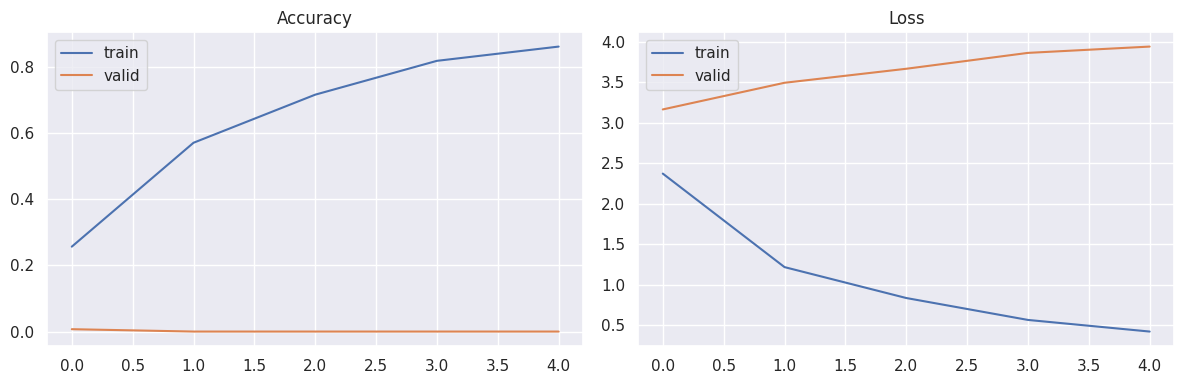

In [23]:
plot_acc(history)